# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Scikit-Learn: Introducción y Problema de Clasificación.

En los últimos tiempos se habla mucho de  _machine learning_, _deep learning_, _reinforcement learning_, muchas más cosas que contienen la palabra _learning_ y, por supuesto, _Big Data_. Todo ello motivado por los avances en capacidad de cálculo de los últimos años, y la popularización de lenguajes de alto nivel, que han permitido entrar de lleno en la fiebre de hacer que las máquinas aprendan. 

En esta clase veremos una breve introducción al machine learning, y aprenderemos a utilizar el paquete `scikit-learn` de Python, con el objetivo de crear modelos predictivos a partir de nuestros datos de una manera rápida y sencilla. En concreto, veremos cómo resolver el problema de clasificación.

## ¿En qué consiste el machine learning?

El machine learning es una rama de la inteligencia artificial, cuyo objetivo es desarrollar técnicas para enseñar a las máquinas a llevar a cabo ciertas tareas, mostrándoles previamente algunos ejemplos y cómo o cómo no llevar a cabo la tarea de forma exitosa. Por lo tanto, se busca crear programas capaces de generalizar comportamientos a partir de una información suministrada en forma de ejemplos, aprendiendo de ellos, y sin que hayan sido programados a mano punto a punto y detalle a detalle para realizar exitosamente esa tarea.

Los diferentes algoritmos de aprendizaje automático, se agrupan en dos grandes grupos:

* **Aprendizaje supervisado**, cuando tengo datos _etiquetados_, es decir: conozco la variable a predecir de un cierto número de observaciones. Pasándole esta información al algoritmo, este será capaz de predecir dicha variable cuando reciba observaciones nuevas. Por lo tanto, se produce una función que establece una correspondencia entre las entradas y las salidas deseadas del sistema.   
Además, dentro de este grupo, tendremos dos tipos de problemas dependiendo de la naturaleza de la variable a predecir:
   - **Clasificación**, si la variable a predecir es discreta o categórica (sí/no, color de ojos, etc)
   - **Regresión**, si la variable a predecir es continua.

  
* **Aprendizaje no supervisado**, cuando no tenemos datos _etiquetados_ y por tanto no tengo ninguna información _a priori_ sobre las categorías de esos ejemplos. Por lo tanto, en este caso, los algoritmos deben ser capaces de descubrir patrones en los datos y agruparlos. Si bien, tendremos que manualmente inspeccionar el resultado después y ver qué sentido podemos darle a esos grupos.
Dentro de este grupo podemos distinguir:
  - **Clustering**, agrupamiento automáticos de objetos similares en sets..
  - **Reducción de la dimensionalidad**, reducir el número de variables aleatorias a considerar.

En función de la naturaleza de nuestro problema, `scikit-learn` proporciona una gran variedad de algoritmos que podemos elegir.

![Machine Learning map](../images/ml_map.png)

## ¿Qué es scikit-learn?

`scikit-learn` es una libreria que nos proporciona un conjunto de algoritmos de machine learning, que incluyen regresión, clasificación, reducción de la dimensionalidad y clustering.

Se articula sobre la librería `NumPy` y `SciPy` y nos permite enfrentarnos a la resolución de estos problemas a través de un a APi limpia y bien hecha. En ese sentido, se trabaja igual que con SciPy, es decir, se importan explícitamente los módulos que se necesitan de la librería.

Hay que indicar que no está especialmente diseñada para datasets super grandes, pero hay cada vez más mejoras en ese área.  

In [1]:
# preserve
from IPython.display import HTML
HTML('<iframe src=http://scikit-learn.org/stable/#" width="700" height="400"></iframe>')

#### ¿Cómo se trabaja con scikit-learn?

El proceso para usar `scikit-learn` es el siguiente:

1. Separar los datos en matriz de características `features` y variable a predecir `target`
2. Seleccionar el modelo `estimator`.
3. Elegir los hiperparámetros
4. Ajustar o entrenar el modelo (`model.fit`)
5. Predecir con datos nuevos (`model.predict`)

## Ejemplos

In [2]:
# Importamos las librerías que usamos de forma habitual
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problema de Regresión

En primer lugar vamos a resolver un problema muy sencillo de regresión, que consiste en ajustar una recta a unos datos. Esto difícilmente se puede llamar _machine learning_, pero nos servirá para ver cómo es la forma de trabajar con `scikit-learn`.

Como partida, fabricamos unos datos distribuidos a lo largo de una recta con un poco de ruido y los pintamos para ver el resultado.

In [3]:
np.random.seed(42)
x = np.random.randn(50)
y = 2.0 * x + 0.8 * np.random.randn(50)

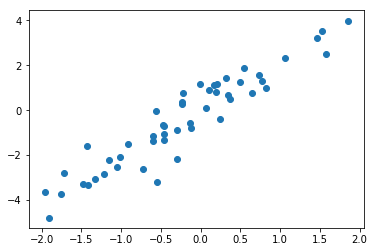

In [4]:
plt.scatter(x, y)

A continuación, importamos el estimador de Regresión Lineal y creamos nuestro modelo.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(fit_intercept=True)

<div class="alert alert-info">Tenemos que hacer este `reshape` para transformar nuestro vector en una matriz de columnas. Rara vez tendremos que repetir este paso, puesto que en la práctica siempre tendremos varias variables.</div>

In [7]:
features = x.reshape(-1, 1)

El siguiente paso es ajustar nuestro modelo.

In [8]:
model.fit(features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Y una vez hecho esto, ya podemos calcular predicciones para los mismos datos

In [9]:
y_pred = model.predict(features)

Ahora, lo que vamos a hacer es calcular un tipo de error asocido a esta predicción, usando el módulo `sklearn.metrics`:

In [10]:
from sklearn import metrics

In [11]:
abs_error = metrics.mean_absolute_error(y, y_pred)
abs_error

0.5294870753180013

Y ahora predecimos con datos nuevos y vemos el resultado

In [12]:
x_new = np.linspace(x.min(), x.max(), 10)

In [13]:
y_pred_new = model.predict(x_new.reshape(-1, 1))

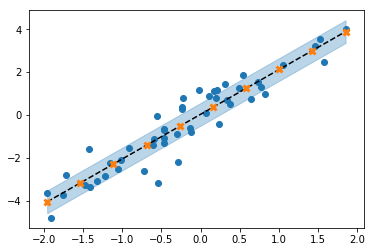

In [14]:
plt.scatter(x, y)

plt.plot(x_new, y_pred_new, 'k--')
plt.scatter(x_new, y_pred_new, marker='x', lw=3, zorder=10)

plt.fill_between(x_new, y_pred_new + abs_error, y_pred_new - abs_error, color="C0", alpha=0.3)

### Problema de Clasificación

En `scikit-learn` tenemos disponibles muchos datasets clásicos de ejemplo que podemos utilizar para practicar. Uno de ellos es el dataset MNIST, que consiste en imágenes escaneadas de números escritos a mano por funcionarios de los EEUU, y que pueden ser de 10 posibles clases diferentes.

Para cargarlo, importamos la función correspondiente de `sklearn.datasets`:

In [15]:
# Importamos los datasets
from sklearn import datasets

Un dataset es un objeto parecido a un diccionario que almacena los datos y algunos metadatos asociados.

In [16]:
# Cargamos el dataset the digits que es con el que vamos a trabajar.
digits = datasets.load_digits()

Los datos de las muestras, están almacenados en `.data`, que siempre es un array 2D de `n_samples` por `n_features`.

In [17]:
# vemos el contenido de los datos
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [18]:
# vemos cuantas muestras y características tenemos 
digits.data.shape

(1797, 64)

Tenemos 1797 muestras, y cada una está caracterizada por 64 valores. En este caso, cada muestra original consiste en una imagen de (8,8), es decir, 64 características, a la que se puede acceder por índice, por ejemplo:

In [19]:
# acceso a una muestra
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Por otro lado, en el caso de problemas supervisados, se almacenan en `.target` una o más variables de respuesta, que en nuestro ejemplo consisten en un número para cada muestra, y que correponde con el dígito que estamos intentando aprender.

In [20]:
# vemos los targets
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
# vemos cuantos targets tenemos (mismos que muestras)
len(digits.target)

1797

Además, podemos ver cuáles son los posibles valores que toman estos targets.

In [22]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Por último, podemos extraer información global sobre el dataset de la siguiente forma:

In [23]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Ya tenemos los datos separados en matriz de características y vector de predicción. En este caso, tendremos 64 = 8x8 características (un valor numérico por cada pixel de la imagen) y una variable a predecir que será el número en sí y que irá de 0 a 8.

Vamos a visualizar una de las imágenes como ejemplo para hacernos una idea. 

In [24]:
# elegimos por ejemplo los datos asociados a la muestra 42
data_num_ej = digits.data[42]
data_num_ej

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

In [25]:
# vemos qué número sabemos que almacena esta muestra
label_num_ej = digits.target[42]
label_num_ej

1

In [26]:
# Hacemos un reshape a la muestra para poder represetnarla 
#(sabemos que viene en un array 1D, pero se corresponde con uno 2D de 8x8)
data_num_ej_2D = data_num_ej.reshape(8, 8).astype(int)

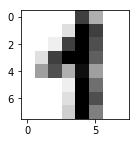

In [27]:
# Pintamos el resultado
# (Si todo ha ido bien, deberíamos ver el valor indicado por label_num_ej)
plt.figure(figsize=(2, 2))
plt.imshow(data_num_ej_2D, cmap=plt.cm.gray_r)

Ten en cuenta que nosotros sabemos qué número es cada imagen porque somos humanos y podemos leerlas. El ordenador lo sabe porque están etiquetadas, pero ¿qué pasa si viene una imagen nueva? 

El objetivo por lo tanto es, dada una imagen, predecir qué dígito representa, y como hemos indicado a la hora de explicar el proceso a seguir, el siguiente paso es construir un modelo de clasificación.

Cada algoritmo está expuesto desde scikit-learn a través de un objeto `"Estimador"`. Por ejemplo, en este caso vamos a elegir un modelo de regresión logística:

In [28]:
# Importamos el modelo
from sklearn.linear_model import LogisticRegression

In [29]:
# Creamos la instancia del modelo
model = LogisticRegression()

Una vez importado y creado, lo que hacemos es ajustar nuestro modelo con él, usando `fit`.

In [30]:
# Ajustamos el modelo
model.fit(digits.data, digits.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Y tras ajustar el modelo, vamos a calcular sus predicciones para los mismos datos de entrenamiento, usando `predict`.

In [31]:
targets_pred = model.predict(digits.data)

Por últimos, vamos a comparar esas predicciones con los datos reales, para ver qué tal ha sido el ajuste. Para ello usamos `sklearn.metrics` para medir la eficacia del algoritmo.

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(digits.target, targets_pred)

0.993322203672788

¡Parece que hemos acertado prácticamente todas! Más tarde volveremos sobre este porcentaje de éxito, que bien podría ser engañoso. De momento, representemos otra medida de éxito que es la matriz de confusión, y que nos indica el nñumero de observaciones Cij, que sabemos que tendrían que ir en el grupo i, pero que que se ha predecido que están en el grupo j.

In [34]:
conf_matrix = metrics.confusion_matrix(digits.target, targets_pred)
conf_matrix

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 179,   0,   1,   0,   0,   0,   0,   2,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   5,   0,   1,   0,   0,   0,   0, 168,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   2, 177]])

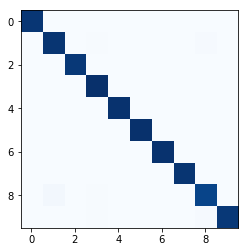

In [35]:
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

¡Y ya está! Lo básico de `scikit-learn` está aquí. Lo próximo será usar diferentes tipos de modelos y examinar con rigor su rendimiento para poder seleccionar el que mejor funcione para nuestros datos.

---
Hemos aprendido:
* En que consiste el machine learning.
* Como empezar a usar la librería scikit-learn
* Resolver un problema de clasificación y otro de regresión.

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [36]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())